In [1]:
import numpy as np
import mne

raw_data = np.load('data_all_4_47_ds.npy')
print(raw_data.shape)

(80, 229000, 32)


In [ ]:
# load eeg data into mne
ch_names = ['Fp1', 'Fp2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'FC1', 'FC2', 'FC5', 'FC6', 'Cz', 'C3', 'C4', 'T7', 'T8', 'CP1', 'CP2', 'CP5', 'CP6', 'Pz', 'P3', 'P4', 'P7', 'P8', 'PO3', 'PO4', 'Oz', 'O1', 'O2', 'A2', 'A1'] 
ch_types = ['eeg']*len(ch_names)
sfreq = 125
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sfreq)
info.set_montage('standard_1020')

mne_raw = [[] for i in range(raw_data.shape[0])]
for i in range(raw_data.shape[0]):
    mne_raw[i] = mne.io.RawArray(raw_data[i,:,:].transpose(), info)

Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ..

Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range : 0 ... 228999 =      0.000 ...  1831.992 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=229000
    Range

In [ ]:
# epoch by sec
events = mne.make_fixed_length_events(mne_raw[0], id=1, start=0, stop=None, duration=1.0, first_samp=True, overlap=0.0)
time_length = [81, 63, 73, 78, 69, 90, 56, 60, 105, 45, 60, 82, 35, 44, 38, 43, 55, 69, 73, 129, 77, 75, 34, 37, 67, 63, 54, 77]
labels = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8]
t = 0
for m in range(len(labels)):
    events[t:t+time_length[m],2] = labels[m]
    t += time_length[m]
epochs = [[] for i in range(80)]
for i in range(80):
    epochs[i] = mne.Epochs(mne_raw[i], events, tmin=0, tmax=0.992, baseline=None, preload=True)

Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 125 original time points ...
0 bad epochs dropped
Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 125 original time points ...
0 bad epochs dropped
Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 125 original time points ...
0 bad epochs dropped
Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 125 original time points ...
0 bad epochs dropped
Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 125 origin

Using data from preloaded Raw for 1832 events and 125 original time points ...
0 bad epochs dropped
Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 125 original time points ...
0 bad epochs dropped
Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 125 original time points ...
0 bad epochs dropped
Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 125 original time points ...
0 bad epochs dropped
Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 125 original time points ...
0 bad epochs dropped
Not setting metadata
1832 matching events found
No baseline correcti

Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 125 original time points ...
0 bad epochs dropped


In [ ]:
# PSD
psd = [[] for i in range(80)]
for i in range(80):
    psd[i] = epochs[i].compute_psd(method='multitaper', fmin=4, fmax=47)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

C:\Users\liuxj\AppData\Local\Temp\ipykernel_12680\4280037726.py:3: UserWarning: Zero value in spectrum for channel F8
  psd[i] = epochs[i].compute_psd(method='multitaper', fmin=4, fmax=47)


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

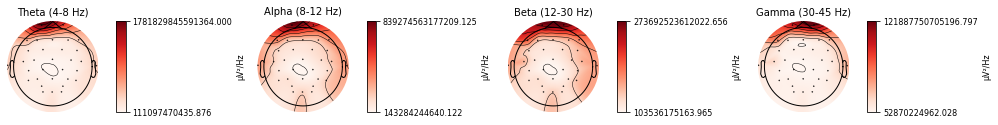

C:\Users\liuxj\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


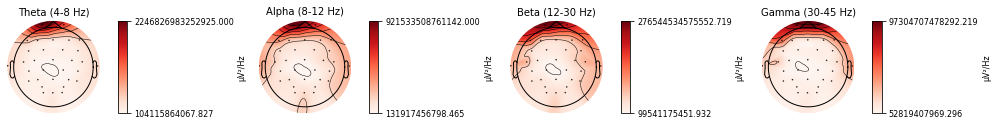

C:\Users\liuxj\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


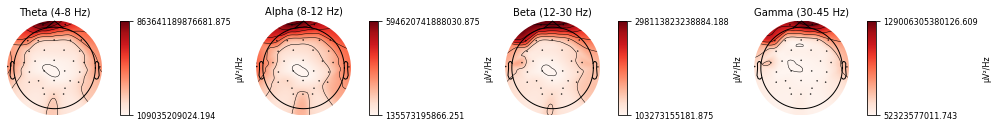

C:\Users\liuxj\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


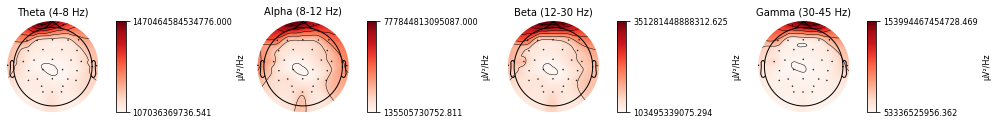

C:\Users\liuxj\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


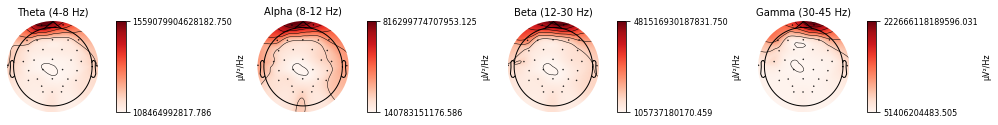

C:\Users\liuxj\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


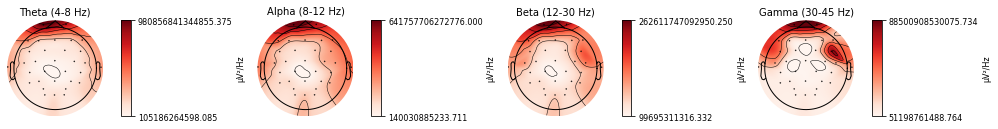

C:\Users\liuxj\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


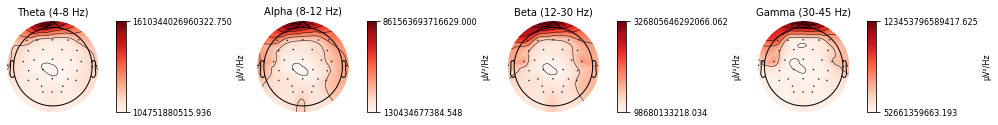

C:\Users\liuxj\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


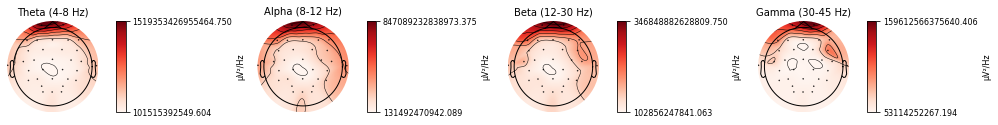

C:\Users\liuxj\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


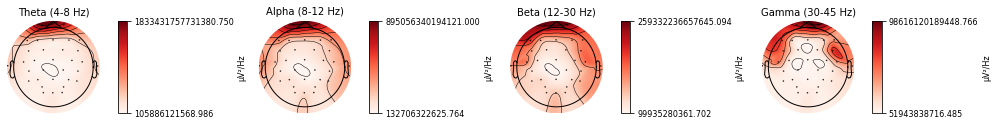

C:\Users\liuxj\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


In [ ]:
# PSD distribution: one subject under different emotions 
import matplotlib.pyplot as plt

for mood in ['0','1','2','3','4','5','6','7','8']:
    fig, ax = plt.subplots(1,4,figsize=(14,7))
    
    psd[5][mood].plot_topomap(bands = {'Theta (4-8 Hz)': (4, 8),
             'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30),
             'Gamma (30-45 Hz)': (30, 47)},axes=ax)
    fig.show()

In [ ]:
# save PSD data
ts = np.zeros([10]).astype(int)
t = 0
for m in range(len(labels)):
    t += time_length[m]
    ts[labels[m]+1] = t
data_psd = np.zeros([80,1832,32,44])
for i in range(80):
    data_psd[i,:,:,:] = psd[i].get_data()
np.save('data_psd.npy',data_psd)

C:\Users\liuxj\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


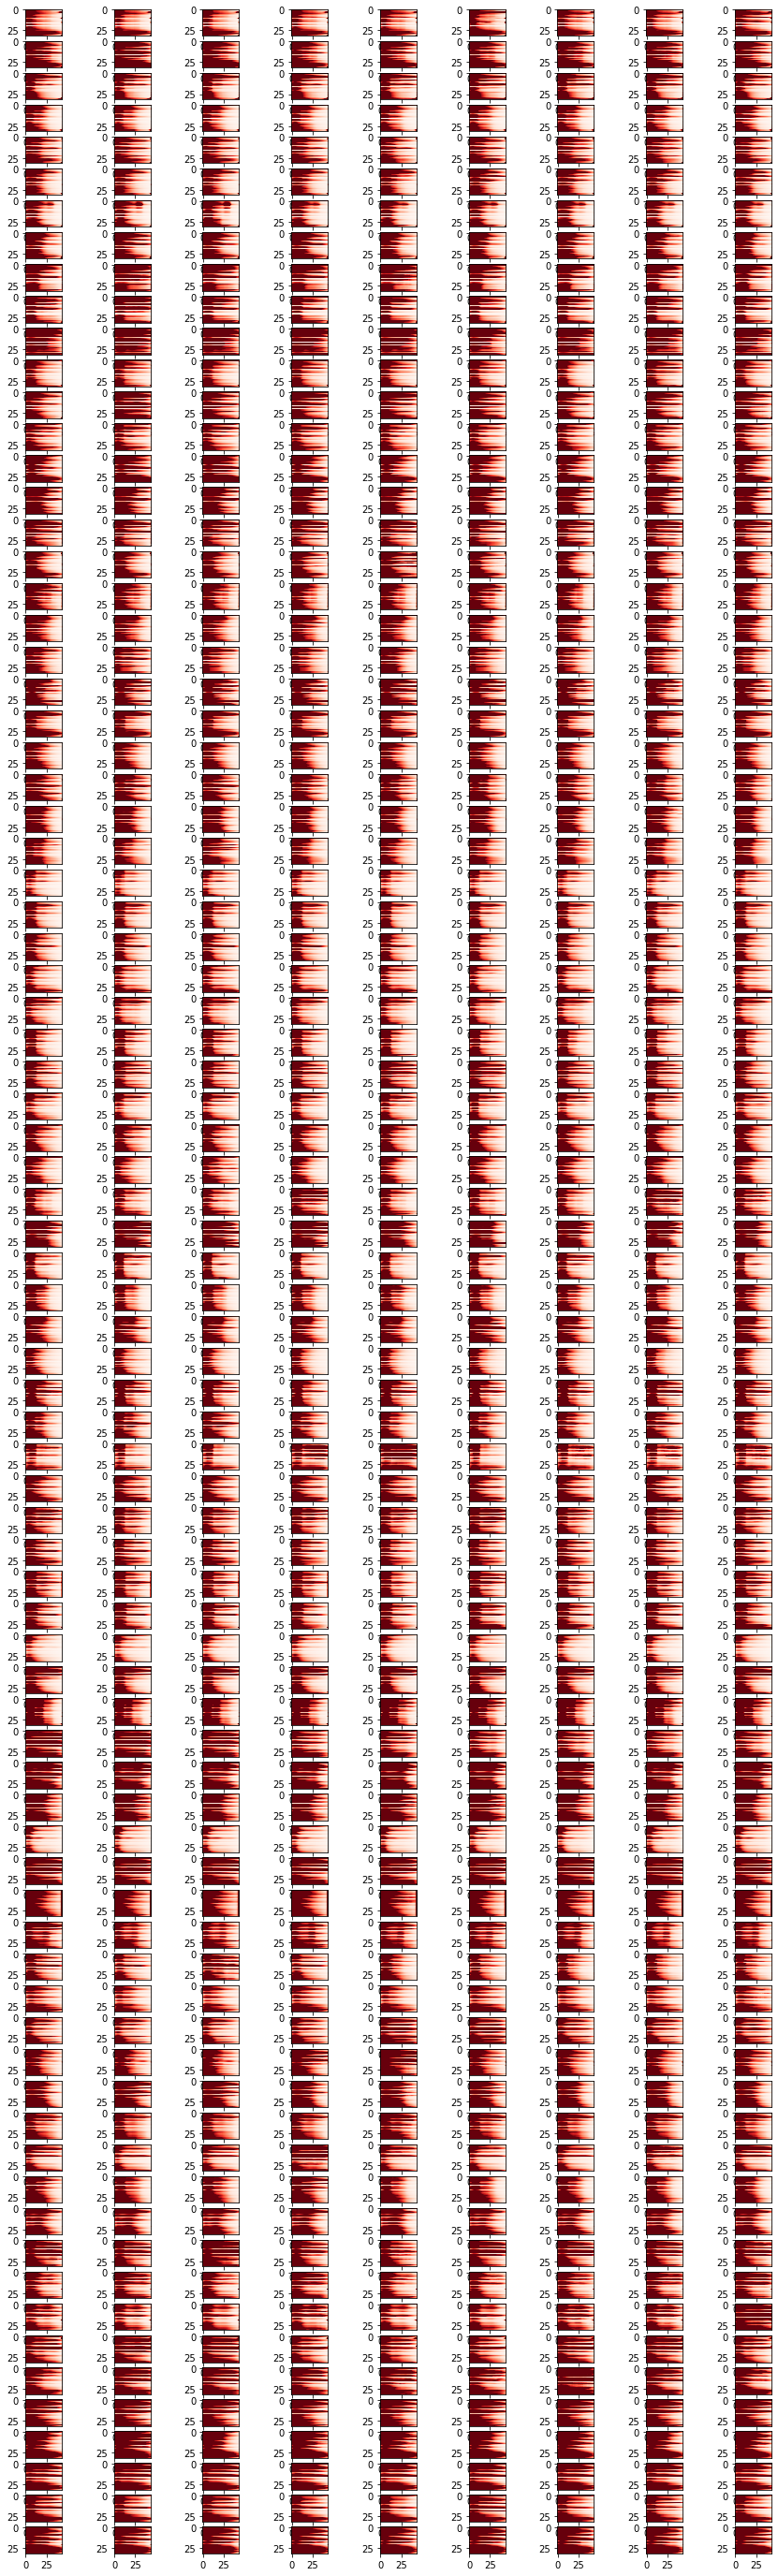

In [ ]:
# avg PSD for each emotion of all subjects
import numpy as np
import matplotlib.pyplot as plt

data_psd = np.load('data_psd.npy')
fig, ax = plt.subplots(80,9,figsize=(15,50))
vmax = 2*np.median(data_psd)
ts = np.zeros([10]).astype(int)
t = 0
time_length = [81, 63, 73, 78, 69, 90, 56, 60, 105, 45, 60, 82, 35, 44, 38, 43, 55, 69, 73, 129, 77, 75, 34, 37, 67, 63, 54, 77]
labels = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8]
for m in range(len(labels)):
    t += time_length[m]
    ts[labels[m]+1] = t
for i in range(80):
    for M in range(9):
        ax[i,M].imshow(np.mean(data_psd[i,ts[M]:ts[M+1],:,:],axis=0),vmin=0,vmax=vmax,cmap='Reds')
fig.show()